<a href="https://colab.research.google.com/github/Manikanta898/Admissions-Process-Analysis/blob/main/Admissions_Process_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    



##### **Project Type**    - Admissions Process Analysis
##### **Contribution**    - Individual


# **Project Objective & Summary**

To gain insights from the dataset related to user behavior,
cooking preferences, and order trends and creating the visualizations to showcase key insights. The process involves in
cleaning and merging the data, analyzing the relationship between
cooking sessions and user orders, identifying popular dishes, and exploring
demographic factors that influence user behavior.

# **GitHub Link**

https://github.com/Manikanta898/upliance.ai_Assignment

# 1. Data Preparation

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load the Excel file and display sheet names
excel_path = "/content/Assignment _ Admissions Process Analysis.xlsx"
xls = pd.ExcelFile(excel_path)
xls.sheet_names

['Aptitude_Data',
 'Communication_Data',
 'Demographics_Applications',
 'Interview_Data']

### Dataset Information

In [ ]:
# Load all sheets into DataFrames
aptitude_df = pd.read_excel(excel_path, sheet_name='Aptitude_Data')
communication_df = pd.read_excel(excel_path, sheet_name='Communication_Data')
demographics_df = pd.read_excel(excel_path, sheet_name='Demographics_Applications')
interview_df = pd.read_excel(excel_path, sheet_name='Interview_Data')

In [ ]:
# Merge all datasets on ApplicationID
merged_df = demographics_df.merge(interview_df, on="ApplicationID", how="left") \
                           .merge(aptitude_df, on="ApplicationID", how="left") \
                           .merge(communication_df, on="ApplicationID", how="left")

# Clean column names for easier handling
merged_df.columns = [col.strip().replace(" ", "_") for col in merged_df.columns]

# Convert relevant date fields to datetime
date_cols = ['DateApplied', 'InterviewDate', 'TestDate', 'Date']
for col in date_cols:
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# Display cleaned and merged data
merged_df.head()

,ApplicationID,Name,Gender,Age,City,State,AppliedProgram,ApplicationStatus,DateApplied,InterviewerName,...,Feedback,TestDate,QuantitativeScore,LogicalScore,VerbalScore,TotalScore,Channel,Date,MessageType,ResponseTime_(hours)
0,A00001,Jennifer Jones,Other,31,Kinghaven,Nebraska,Business,Accepted,2024-10-17,Thomas Johnson,...,Average performance,2024-12-03,30,15,27,72,Email,2024-03-17,Thank You,4.0
1,A00002,Samantha Marshall,Female,19,Jamieville,Indiana,Law,Rejected,2024-02-20,John Greene,...,Excellent communication,2024-03-22,14,13,38,65,WhatsApp,2024-01-20,Application Status,48.0
2,A00003,Troy Fisher,Male,29,Franciscohaven,Mississippi,Business,Rejected,2024-01-13,Heather Crosby,...,Needs improvement,2023-12-18,12,18,28,58,Email,2024-05-29,Follow-Up,NaN
3,A00004,Nicholas Neal,Female,23,Josephshire,Minnesota,Law,Interview Scheduled,2024-02-07,Christina Johnson,...,Average performance,2024-11-13,24,34,35,93,Email,2024-11-21,Follow-Up,2.0
4,A00005,Linda Wells,Male,26,Port Aimeeview,Rhode Island,Business,Interview Scheduled,2024-05-08,Sean Meyer,...,Needs improvement,2024-07-17,28,10,16,54,Email,2024-07-11,Thank You,NaN


# 2. Data Analysis and Insights

**1. Admissions Funnel Analysis**

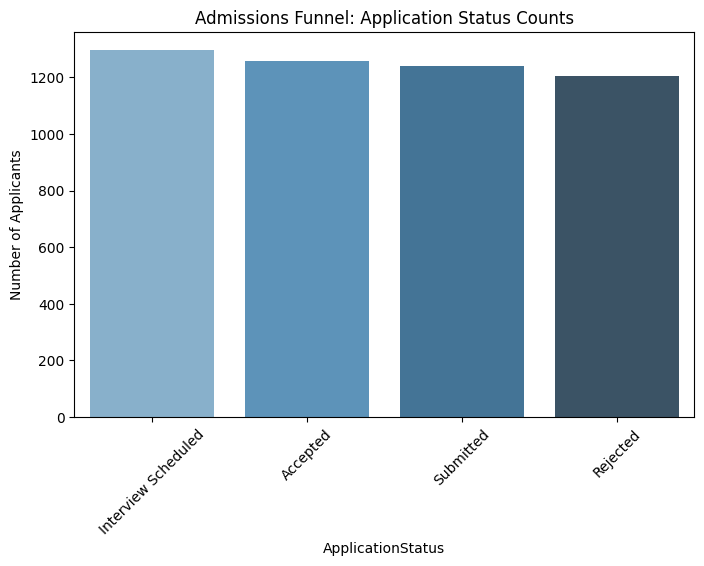

In [ ]:
funnel_counts = merged_df['ApplicationStatus'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=funnel_counts.index, y=funnel_counts.values, palette='Blues_d')
plt.title("Admissions Funnel: Application Status Counts")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.show()

**2. Identifying demographic trends**

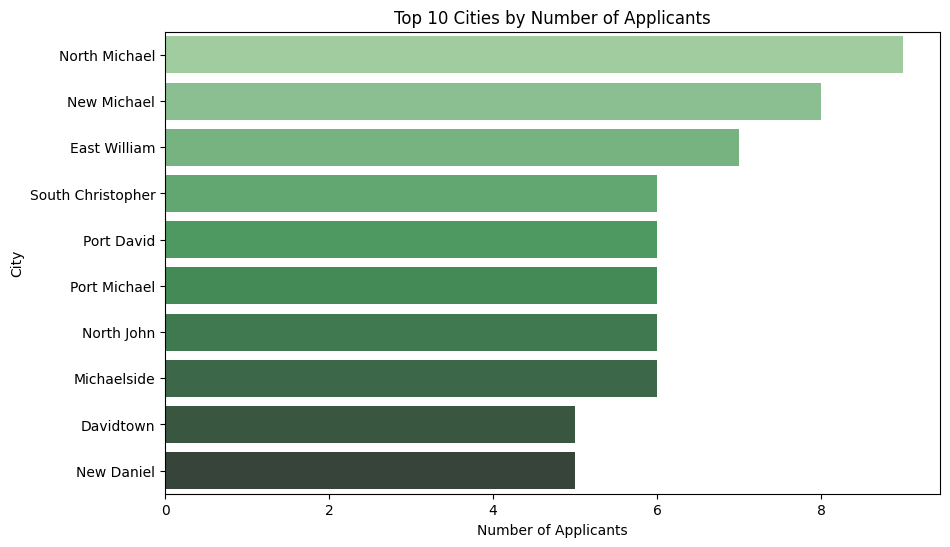

In [ ]:
# Top Cities
top_cities = merged_df['City'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Greens_d")
plt.title("Top 10 Cities by Number of Applicants")
plt.xlabel("Number of Applicants")
plt.show()

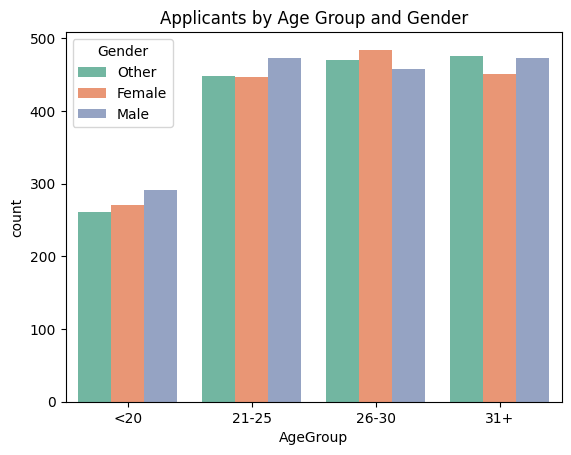

In [ ]:
# Age Grouping
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=[0, 20, 25, 30, 100], labels=['<20', '21-25', '26-30', '31+'])
sns.countplot(data=merged_df, x='AgeGroup', hue='Gender', palette='Set2')
plt.title("Applicants by Age Group and Gender")
plt.show()

**3. Applicant's Performance Evaluation**

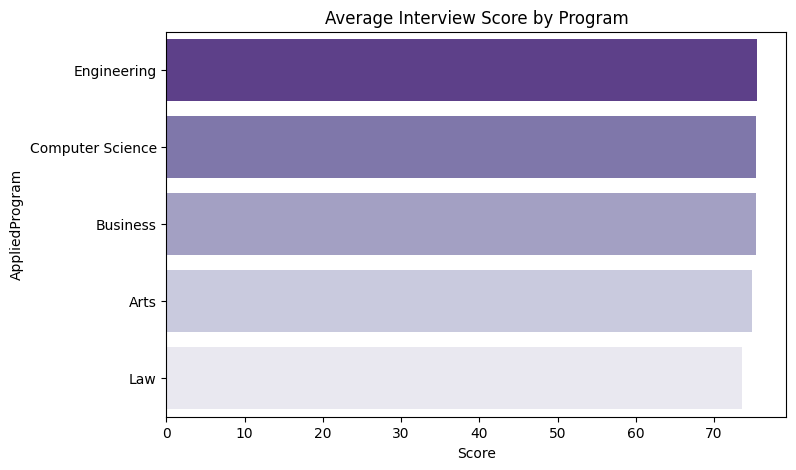

In [ ]:
# Average Interview Score by Program
avg_score_by_program = merged_df.groupby('AppliedProgram')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_score_by_program.values, y=avg_score_by_program.index, palette="Purples_r")
plt.title("Average Interview Score by Program")
plt.xlabel("Score")
plt.show()

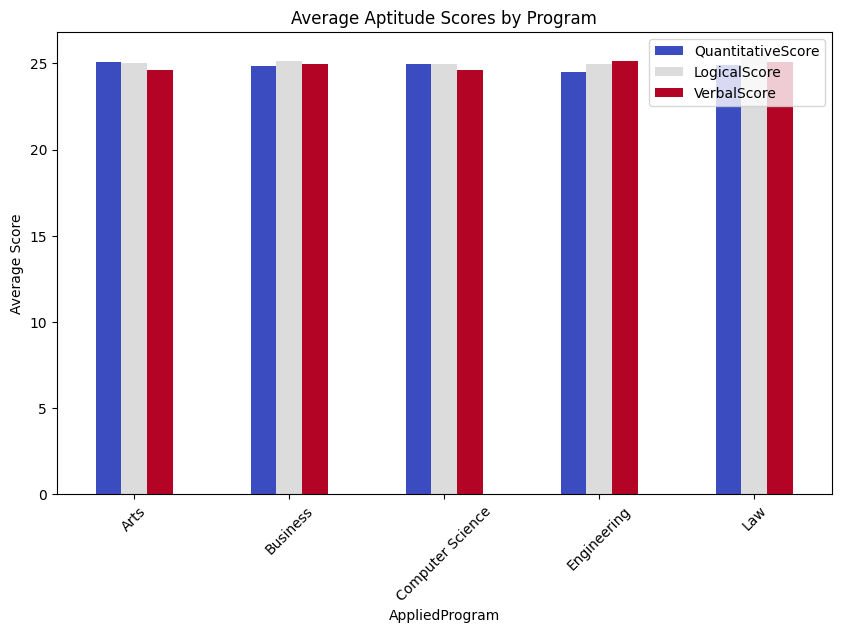

In [ ]:
# Aptitude Test Scores by Program
aptitude_means = merged_df.groupby('AppliedProgram')[['QuantitativeScore', 'LogicalScore', 'VerbalScore']].mean()
aptitude_means.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Average Aptitude Scores by Program")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

**4. Assessing the impact of communication channels**

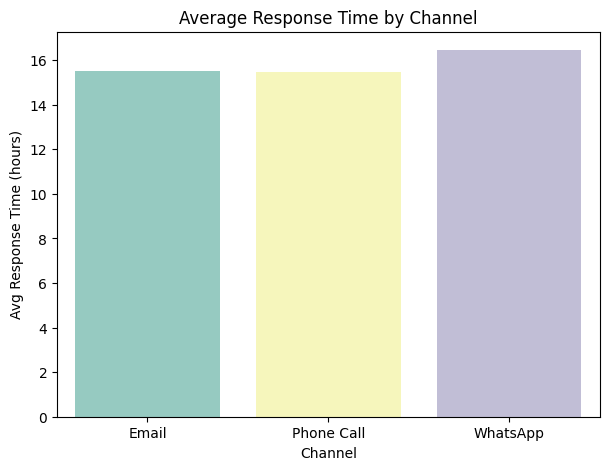

In [ ]:
# Average Response Time by Channel
response_avg = merged_df.groupby('Channel')['ResponseTime_(hours)'].mean().dropna()

plt.figure(figsize=(7,5))
sns.barplot(x=response_avg.index, y=response_avg.values, palette="Set3")
plt.title("Average Response Time by Channel")
plt.ylabel("Avg Response Time (hours)")
plt.show()

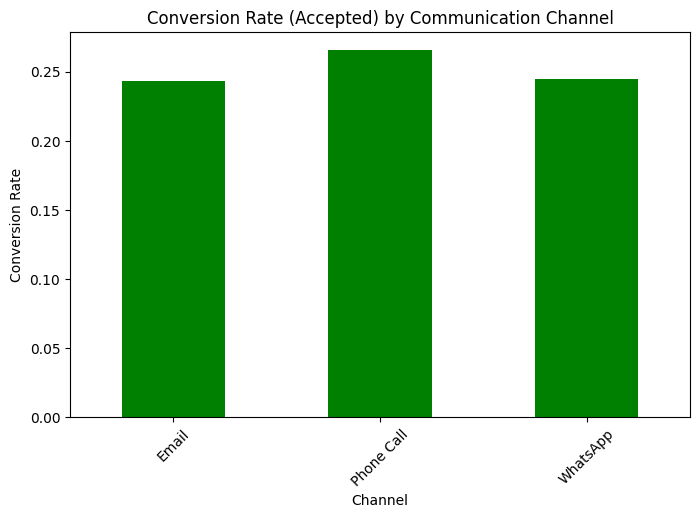

In [ ]:
# Conversion Rate by Channel
conversion_by_channel = merged_df.groupby('Channel')['ApplicationStatus'].value_counts(normalize=True).unstack().fillna(0)

conversion_by_channel['Accepted'].plot(kind='bar', figsize=(8,5), color='green')
plt.title("Conversion Rate (Accepted) by Communication Channel")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

### Manipulations I did and insights I found:

Dropped rows with missing 'Rating' to maintain essential information.

Grouped data by Location and Total Orders, Amount to understand the total number of orders and revenue generated from each city.
- New York has the Maximum Number of orders with 36
- Miami has the Minimum Number of orders with 5
- New York generated the highest revenue at 35.0
- Chicago generated the lowest revenue at 8.5

I found that Dinner is favorite meal among other meals.

Among all meal types, dinner has the highest number of orders.

Spaghetti has the highest number of orders, while Veggie Burger has the lowest.

## **Solution to Business Objective**

Boost Marketing in New York: Since New York has the most orders, focus more on advertising and promotions there to keep growing sales.

Promote Miami More: Miami has the fewest orders, so run special offers or discounts to encourage more customers to order.

Encourage More Dinner Orders: Since dinner is the most popular meal, offer dinner specials or deals to attract even more dinner orders.

Improve Sales in Chicago: Chicago has the lowest revenue, so consider changing the menu, offering discounts, or running ads to get more people to order.

Highlight Spaghetti and Improve Veggie Burger: Spaghetti is the most popular dish, so promote it more. For the Veggie Burger, try making it more appealing by changing its ingredients or promoting it better.

# **Conclusion**

By leveraging these insights and recommendations, clients can make informed decisions to enhance their market presence, optimize orders frequency rates, and maximize revenue in the  market.